In [1]:
import numpy as np
import matplotlib.pyplot as plt
from autograd.tensor import Tensor
from autograd.optim import SGD
from autograd.losses import CategoricalCrossEntropy
from autograd.datautil import fetch_mnist

In [2]:
X_train, Y_train, X_test, Y_test = fetch_mnist()
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz already exists, reading it... done!
http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz already exists, reading it... done!
http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz already exists, reading it... done!
http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz already exists, reading it... done!
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [28]:
class Net:
    def __init__(self, n_classes):
        self.l1 = Tensor.uniform(784, 128)
        self.l2 = Tensor.uniform(128, n_classes)
    
    def __call__(self, x):
        return self.forward(x)
    
    def forward(self, x):
        x = x.matmul(self.l1)
        x = x.relu()
        x = x.matmul(self.l2)
        x = x.logsoftmax()
        return x

    
model = Net(10)
criterion = CategoricalCrossEntropy()
optimizer = SGD([model.l1, model.l2], lr=0.005)

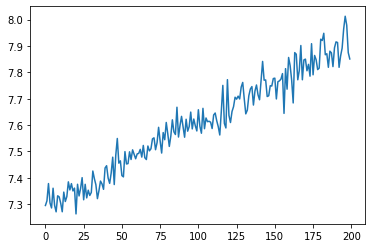

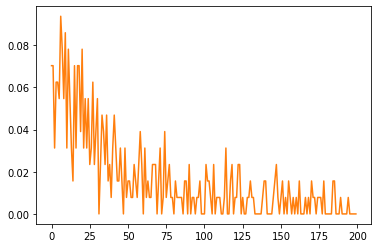

In [29]:
batch_size = 128
epochs = 200
history = {}
history['loss'] = []
history['acc'] = []

for epoch in range(epochs):
    indices = np.random.randint(0, X_train.shape[0], size=(batch_size))
    samples = Tensor(X_train[indices].reshape((-1, 784)))
    targets = Y_train[indices]
    
    preds = model(samples)
    loss = criterion(preds, targets)
    history['loss'].append(loss.data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    acc = np.argmax(preds.data, axis=-1)
    acc = (acc == targets).mean()
    history['acc'].append(acc)
    
    
plt.plot(history['loss'], color='tab:blue')
plt.show()
plt.plot(history['acc'], color='tab:orange')
!